<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#1.-Импорт-библиотек">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>
                    Импорт библиотек
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#2.-Подготовка-данных">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>
                    Подготовка данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#3.-Семплирование">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>
                    Семплирование
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#3.1.-Rejection-Sampling">
                            <span class="toc-item-num">3.1.&nbsp;&nbsp;</span>
                            Rejection Sampling
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#3.2.-Алгоритм-Метрополиса-Гастингса">
                            <span class="toc-item-num">3.2.&nbsp;&nbsp;</span>
                            Алгоритм Метрополиса-Гастингса
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#4.-Общий-вывод">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Лабораторная работа №6: Sampling

**Задача:** запрограммировать метод Rejection Sampling и алгоритм Метрополиса-Гастингса.

**Источник данных:** сгенерированный набор точек

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 1. Импорт библиотек

Импорт необходимых библиотек:

In [1]:
import numpy as np

from typing import Mapping, Tuple

from utils.plot_charts import plot_chart, \
                              plot_taget_known_distribution_chart, \
                              plot_sampled_chart, \
                              plot_check_dots_chart

Внутрипроектный модуль `plot_charts` включает в себя следующие функции:

* `plot_chart` - построение двумерного статичного графика переданных функций

* `plot_taget_known_distribution_chart` - построение двумерного статичного графика отношения целевой и известной функций

* `plot_sampled_chart` - построение интерактивного двумерного графика семплированной функции

* `plot_check_dots_chart` - построение двумерного статичного графика с точками над и под целевой функцией

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 2. Подготовка данных

Установка начального числа для алгоритма генератора псевдослучайных чисел:

In [2]:
np.random.seed(123)

Задание множества точек:

In [3]:
data = np.linspace(-5, 5, 1000)

За основу известной для семплирования функции будет взята функция нормального распределения:

$$ g(x; \mu, \sigma) = \frac {1}{\sqrt{2 \pi \sigma^2}} * e^{- \frac {1}{2} (\frac {x - \mu}{\sigma})^2} $$

Задание функции нормального распределения:

In [4]:
normal_func = lambda x: np.e ** (-0.5 * ((x - np.mean(x)) / np.std(x)) ** 2) / (2 * np.pi * np.std(x) ** 2) ** 0.5 

Выведение на экран графика распределения известной функции:

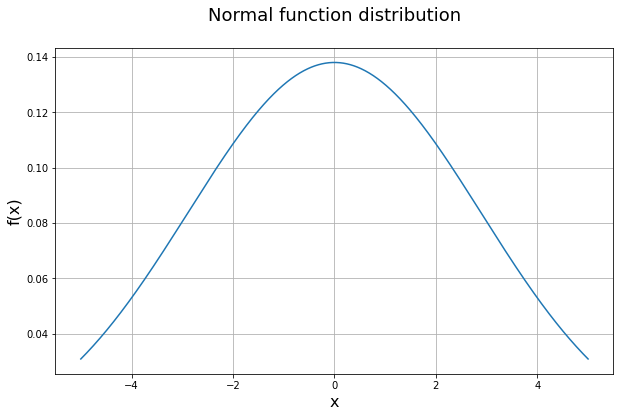

In [5]:
plot_chart(data, normal_func, 'Normal function distribution')

В качестве простой функции для семплирования будет рассмотрена следующая экспоненциальная функция: 

$$ f(x) = e^{\frac {-x^2}{18}} - 0.25 $$

In [6]:
simple_func = lambda x: np.e ** (-x ** 2 / 18) - 0.25

Выведение на экран графика распределения известной функции:

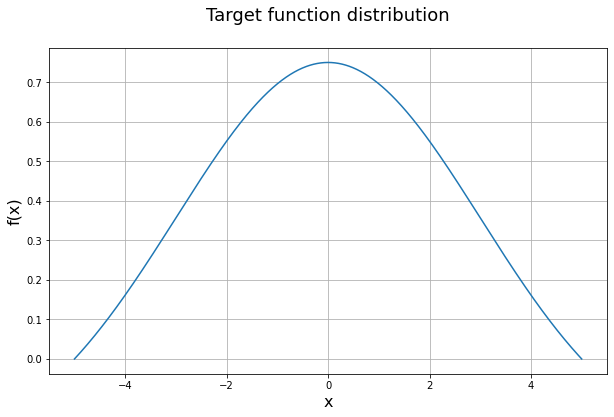

In [7]:
plot_chart(data, simple_func, 'Target function distribution')

В качестве сложной функции для семплирования будет рассмотрена следующая тригонометрическая функция: 

$$ f(x) = e^{- \frac {x^2}{2}} \sin {(6 + x)}^2 + \sin {3x}^2 $$

Задание функции целевого распределения:

In [8]:
complex_func = lambda x: np.e ** (-x ** 2 / 2) * (np.sin(6 + x) ** 2 + np.sin(3 * x) ** 2)

Выведение на экран графика распределения целевой функции:

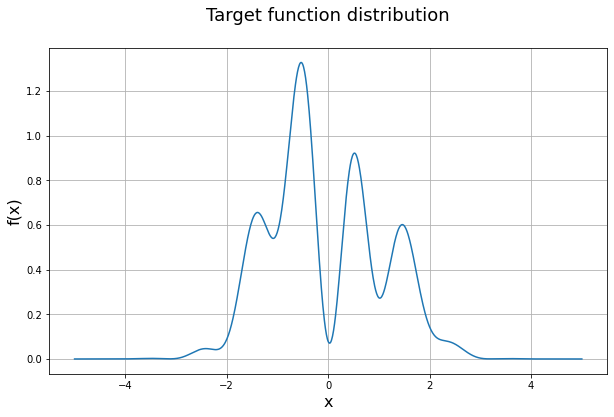

In [9]:
plot_chart(data, complex_func, 'Target function distribution')

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 3. Семплирование

**Семплирование** - способ формирования репрезентативной выборки так, чтобы можно было сделать выводы о генеральной совокупности.

>**Репрезентативность** обеспечивается при случайном выборе элементов из генеральной совокупности. Таким образом каждый элемент имеет равную вероятность попадания в результат.

<div style="height: 2px; background-color: blue; margin: 10px 0; opacity: 0.2"></div>

### 3.1. Rejection Sampling

**Rejection sampling** (выборка с отклонением) - метод, используемый для семплирования сложных вероятностных распределений, в котором генерация семплов по $ f(x) $ происходит с помощью более простого вспомогательного распределения $ g(x) $, которое уже известно, как семплировать, и которое удовлетворяет следующему условию: 

$$ \forall x \to f(x) < cg(x) $$ 

Где:

* $ c $ - константа вероятностного распределения ($ c > 1 $)

За счёт наличия случайных процессов относится к методу Монте-Карло. 

>**Метод Монте-Карло** - численный метод решения математических задач при помощи моделирования случайных величин.
>
>Принцип работы: процесс описывается математической моделью с использованием генератора случайных величин, модель многократно обсчитывается, на основе полученных данных вычисляются вероятностные характеристики рассматриваемого процесса.

**Принцип алгоритма:**

1. Взять семпл $ x $ по распределению $ g(x)$

2. Выбрать случайное число $ u $ равномерно из отрезка $ \big[ 0, cg(x) \big] $

3. Вычислить $ f(x) $

    * Если $ u \leq f(x) $, то $ x $ добавляется к семплам
    
    * Если $ u > f(x) $, то $ x $ отклоняется

Алгоритм выбирает точки $ \big[ x, u \big] $ равномерно из области под графиком $ f(x) $, а это и означает что получаются семплы $ f(x) $.

Алгоритм эффективен, когда форма вспомогательной функции $ g(x) $ близка к форме целевой функции $ f(x) $. 

**Преимущества алгоритма:**

* Подходит для любых распределений
* Подстраивается под целевое распредление
* Подходит для задач небольшой размерности
* Простой в реализации
* Работает, даже если неизвестна константа вероятностного распределения
* Простой поик константы вероятностного распределения

**Недостатки алгоритма:**

* Проблемы при решении задач большой размерности - значение $ c $ будет очень большим (экспоненциальным от размерности), и почти все семплы будут отвергаться

* Плотность вероятности целевого распределения влияет на скорость работы (если очень близка к нулю в большинстве точек)

* Низкая эффективность при слишком большой разнице в распределениях вспомогательной функции и целевой функции

<div style="height: 2px; background-color: blue; margin: 10px 0; opacity: 0.2"></div>

Вычисление константы вероятностного распределения по простой целевой функции:

In [10]:
const_simple = max(simple_func(data) / normal_func(data))

Выведение на экран полученной константы:

In [11]:
print('Константа вероятностного распределения:', const_simple)

Константа вероятностного распределения: 5.43243720325846


Выведение на экран графика распределения функций:

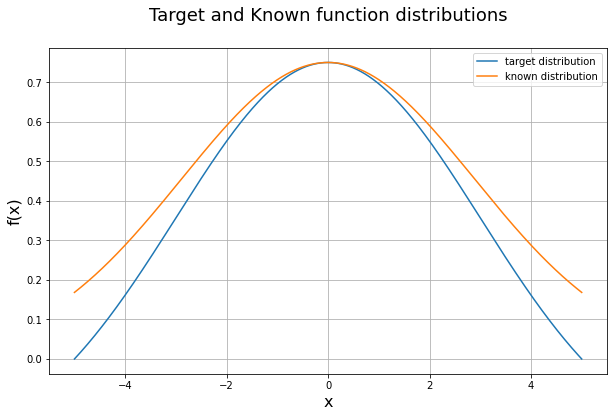

In [12]:
plot_taget_known_distribution_chart(data, simple_func, normal_func, 
                                    'Target and Known function distributions', 
                                    const_simple)

Вычисление константы вероятностного распределения по сложной целевой функции:

In [13]:
const_complex = max(complex_func(data) / normal_func(data))

Выведение на экран полученной константы:

In [14]:
print('Константа вероятностного распределения:', const_complex)

Константа вероятностного распределения: 9.780878463123459


Выведение на экран графика распределения функций:

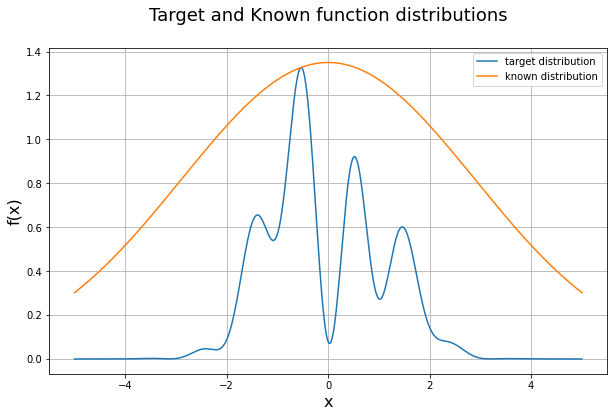

In [15]:
plot_taget_known_distribution_chart(data, complex_func, normal_func, 
                                    'Target and Known function distributions', 
                                    const_complex)

Задание функции, семплирующей точки под графиком:

In [16]:
def rejection_sampling(data: np.array,
                       target_f: Mapping,
                       known_f: Mapping,
                       total: int,
                       const: float = 1) -> Tuple:
    
    """Rejection sampling with function that is known how to be sampled
    
       Args:
           data (np.array): data
           target_f (Mapping): target function
           known_f (Mapping): function that is known how to be sampled 
           total (int): sampling size
           const (float, optional): constant probability distribution value. Defaults to 1
        
       Result:
           Tuple (x, y, passed, samples): uniformed x, uniformed y, values under target function, y values in x 
    """
    
    if const < 1:
        raise ValueError('const should be greater than 0')
        
    x_min = data.min()
    x_max = data.max()
    y_min = target_f(data).min()
    
    x = np.random.uniform(x_min, x_max, size=total)
    y = np.random.uniform(y_min, const * known_f(x), size=total)
    
    passed = y < target_f(x)
    samples = x[y < target_f(x)]
    
    return x, y, passed, samples

Сохранение результатов семплирования:

In [17]:
samples_rejection_simple = rejection_sampling(data, simple_func, normal_func, 10000, const_simple)

Сохранение результатов семплирования целевой функции по самой себе:

In [18]:
self_samples_rejection_simple = rejection_sampling(data, simple_func, simple_func, 10000)

Выведение на экран графика распределения точек ниже и выше целевой функции:

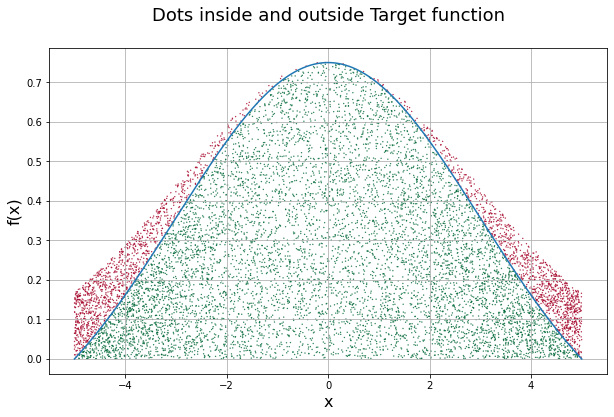

In [19]:
plot_check_dots_chart(data, simple_func, samples_rejection_simple[:-1], 'Dots inside and outside Target function')

Выведение на экран эффективности алгоритма на простой целевой функции:

In [20]:
print(f"Эффективность алгоритма: {round(samples_rejection_simple[2].mean() * 100)} %")

Эффективность алгоритма: 77 %


Выведение на экран графика плотности семплирования целевой функций:

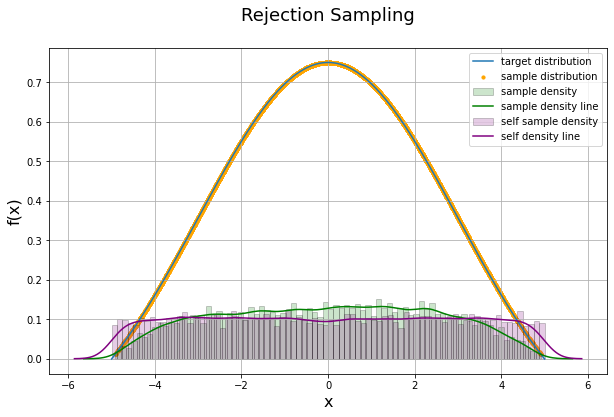

In [21]:
plot_sampled_chart(data, simple_func, samples_rejection_simple[-1], 'Rejection Sampling',
                   self_samples=self_samples_rejection_simple[-1])

>В ходе равномерного распределения точек под графиком известной функции `normal_func` были отмечены точки, составляющие равномерное распределение графика целевой функции `simple_func`.
>
>Поскольку распределение известной функции приближено целевой функции, метод показал высокую эффективность.

Сохранение результатов семплирования:

In [22]:
samples_rejection_complex = rejection_sampling(data, complex_func, normal_func, 10000, const_complex)

Сохранение результатов семплирования целевой функции по самой себе:

In [23]:
self_samples_rejection_complex = rejection_sampling(data, complex_func, complex_func, 10000)

Выведение на экран графика распределения точек ниже и выше целевой функции:

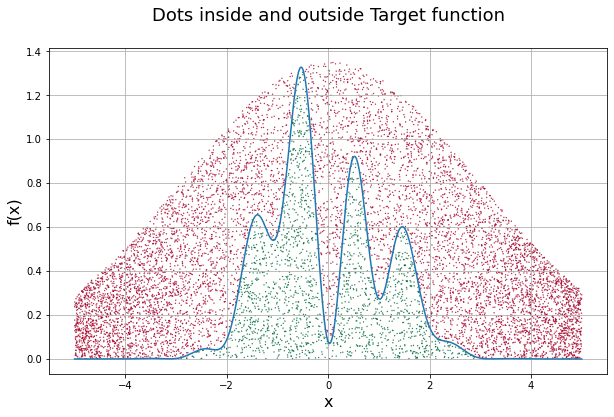

In [24]:
plot_check_dots_chart(data, complex_func, samples_rejection_complex[:-1], 'Dots inside and outside Target function')

Выведение на экран эффективности алгоритма на сложной целевой функции:

In [25]:
print(f"Эффективность алгоритма: {round(samples_rejection_complex[2].mean() * 100)} %")

Эффективность алгоритма: 19 %


Выведение на экран графика плотности семплирования целевой функций:

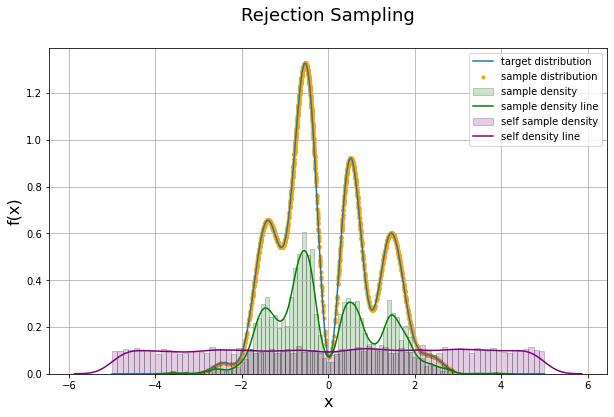

In [26]:
plot_sampled_chart(data, complex_func, samples_rejection_complex[-1], 'Rejection Sampling',
                   self_samples=self_samples_rejection_complex[-1])

>В ходе равномерного распределения точек под графиком известной функции `normal_func` были отмечены точки, составляющие равномерное распределение графика целевой функции `complex_func`.
>
>Поскольку распределение известной функции слишком отличается от целевой функции, метод показал низкую эффективность. Для большей эффективности необходимо, чтобы известная функция достаточно хорошо приближала равномерное распределение целевой функции.

<div style="height: 2px; background-color: blue; margin: 10px 0; opacity: 0.2"></div>

### 3.2. Алгоритм Метрополиса-Гастингса

**Алгоритм Метрополиса-Гастингса** - метод, используемый для семплирования сложных вероятностных распределений, однако в отличии от выборки с отклонением (Rejection Sampling) вспомогательная функция распределения меняется со временем, позволяя семплировать любую функцию распределения.

Этот класс алгоритмов класс алгоритмов называется MCMC-семплированием, поскольку основывается на создании цепи Маркова: на каждом шаге алгоритма новое выбранное значение $ x^{t + 1} $ зависит от предыдущего $ x^t $. Он использует вспомогательную функцию $ Q(x'|x^t) $, зависящую от $ x^t $, для которой легко генерируется выборка. На каждом шаге для этой функции генерируется случайное значение $ x' $, а за тем с вероятностью

$$ u = \frac {P(x') Q(x^t|x')}{P(x^t) Q(x'|x^t)} $$

(или с вероятностью 1, если $ u > 1 $), выбранное значение принимается как новое: $ x^{t + 1} = x' $, а иначе оставляется старое $ x^{t + 1} = x^t $.

Таким образом, алгоритм действует изнутри целевой функции путём построения случайного блуждания под её графиком, переходя от одной точки к другой, и время от времени забирая текущую точку блуждания в качестве семпла. 

>**Цепь Маркова** - последовательность случайных событий с конечным или счётным числом исходов, где вероятность наступления каждого события зависит только от состояния, достигнутого в предыдущем событии.
>
>Принцип работы: алгоритм не помнит, что было раньше, а смотрит только на предыдущее состояние.

>**Марковская цепь Монте-Карло (Markov Chain Monte Carlo - MCMC)** - класс алгоритмов для семплирования, моделирующих некоторое распределение вероятностей. 
>
>Принцип работы: при построении марковской цепи, в которой целевое распределение выступает в качестве равновесного, можно получить выборку с тем же распределением путем записи состояний цепи. Чем больше шагов будет использовано, тем ближе распределение выборки будет к целевому. 

**Принцип алгоритма:**

1. Выбрать случайное значение $ x^t $

2. Для выбора следующего значения получить случайное значение $ x' $ для функции $ Q(x'|x^{t}) $

3. Найти произведение $ a = a_1 a_2 $, где $ a_1 = \frac {P(x')}{P(x^t)} $ является отношением вероятностей между промежуточным значением и предыдущим, а $ a_2 = \frac {Q(x^t|x')}{Q(x'|x^t)} $ является отношением вероятностей между $ x' $ и $ x^t $ или наоборот
    * Если $ Q $ симметрична, то второй множитель равен 1

4. Выбирается случайное значение на следующем шаге:

    * Если $ a \geq 1 $, то $ x^{t + 1} = x' $
    * Если $a < 1 $, то
    
$$ x^{t + 1} = \left\{
    \begin{array}\\
        x' & \mbox{с вероятностью a} \\
        x^t & \mbox{с вероятностью 1 - a}
    \end{array}
\right. $$

Алгоритм стартует из случайного значения $ x^0 $, и сначала некоторое количество шагов прогоняется безрезультатно, чтобы забыть о начальном значении.

Как и в случае с Rejection Sampling лучше всего алгоритм работает тогда, когда форма вспомогательной функции $ Q $ близка к форме целевой функции $ P $. 

**Преимущества алгоритма:**

* Нет аппроксимации - семплы из целефой функции представляют собой независимые одинаково распределённые случайные величины

>**Аппроксимация** - замена одних математических объектов другими, в том или ином смысле близкими к исходным.

* Реализация возможна даже при отсутствии полного представления о целевой функции
* Целевая функция может быть определена вплоть до нормировочного множителя (константы) или интегрального значения
* Не требует сложной калибровки
* Размерность не имеет значения (крупные размерности могут быть разбиты на меньшие)
* Легко адаптируется под другие алгоритмы Монте-Карло 

**Недостатки алгоритма:**

* Семплирование обходится дорого по времени
* Линейная зависимость скорости семплирования с размером входных данных
* Значения коррелируют, из-за чего менее информативны в отличие от независимых равномерно распределённых случайных величин

>**Корреляция** - любая статистическая связь между двумя случайными величинами.

* Медленная сходимость целевой функции
* Бесконечное число вариаций реализации алгоритма за счёт универсальной валидации
* Эффективность алгоритма снижается при больших размерностях
* Низкая эффективность при плохом подборе второстепенной функции

<div style="height: 2px; background-color: blue; margin: 10px 0; opacity: 0.2"></div>

Задание функции, семплирующей точки под графиком:

In [27]:
def mcmc_sampler(data,
                 target_f: Mapping, 
                 known_f: Mapping,
                 total: int, 
                 max_dist: float = .5) -> np.array:
    
    """MCMC sampling with function that is known how to be sampled
    
       Args:
           data (np.array): data
           target_f (Mapping): target function
           known_f (Mapping): function that is known how to be sampled 
           total (int): sampling size
           max_dist (float, optional): maximum distance between previous and next values. Defaults to .5
        
       Result:
           np.array: previous values in probability
    """
    
    x_min = data.min()
    x_max = data.max()
    
    x_prev = np.random.uniform(x_min, x_max)
    samples = [x_prev]
    
    for i in range(total):
        x_next = np.random.normal(x_prev, max_dist)
        
        p_x_next = np.prod(target_f(x_next))
        p_x_prev = np.prod(target_f(x_prev))
        
        q_x_prev_x_next = known_f(np.array(sorted([x_prev, x_next])))[0]
        q_x_next_x_prev = known_f(np.array(sorted([x_next, x_prev])))[0]
        
        p_q_divider = p_x_next * q_x_prev_x_next
        p_q_denominator = p_x_prev * q_x_next_x_prev
        
        a_prob = p_q_divider / p_q_denominator
                
        if np.random.rand() < a_prob:
            x_prev = x_next
        
        samples.append(x_prev)
        
    return np.array(samples)

Сохранение результатов семплирования:

In [28]:
samples_mcmc_simple = mcmc_sampler(data, simple_func, normal_func, 10000)

Сохранение результатов семплирования целевой функции по самой себе:

In [29]:
self_samples_mcmc_simple = mcmc_sampler(data, simple_func, simple_func, 10000)

Выведение на экран графика плотности семплирования целевой функций:

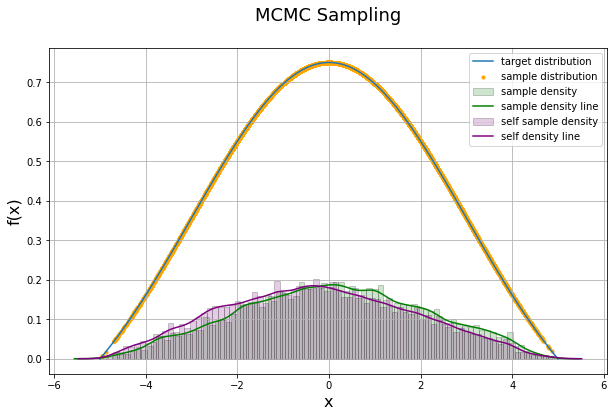

In [30]:
plot_sampled_chart(data, simple_func, samples_mcmc_simple, 'MCMC Sampling',
                   self_samples=self_samples_mcmc_simple)

>Как и в случае с Rejection Sampling заданная ширина диапазона второстепенной функции напрямую влияет на распределение плотности семплов.

Сохранение результатов семплирования:

In [31]:
samples_mcmc_complex = mcmc_sampler(data, complex_func, normal_func, 10000)

Сохранение результатов семплирования целевой функции по самой себе:

In [32]:
self_samples_mcmc_complex = mcmc_sampler(data, complex_func, complex_func, 10000)

Выведение на экран графика плотности семплирования целевой функций:

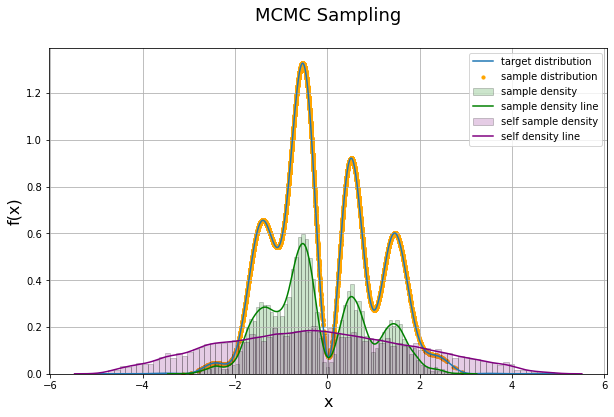

In [33]:
plot_sampled_chart(data, complex_func, samples_mcmc_complex, 'MCMC Sampling',
                   self_samples=self_samples_mcmc_simple)

>Поскольку распределение известной функции слишком отличается от целевой функции, метод также показал низкую эффективность.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

# 4. Общий вывод

Выполнена реализация:

* Метода Rejection Sampling 
* Алгоритм Метрополиса-Гастингса

Произведена оценка работы метода и алгоритма, а также визуализация их поведения на сгенерированных данных для простой и сложной функций.

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Содержание" data-toc-modified-id="Содержание" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        Наверх к содержанию ↑
    </a>
</div>